In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
# print(housing.data.shape)
# print(housing.target.shape)

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [7]:
# 子类API
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        """定义模型的层次"""
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)

    def call(self, input):
        """完成模型的正向计算"""
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output

model = WideDeepModel()
"""
也可以写成
model = keras.models.Sequential([
    WideDeepModel(),
])
"""
model.build(input_shape=(None, 8))

model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  270       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid),
                    epochs=100, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.7659 - val_loss: 2.4592
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 8.2759 - val_loss: 1.7251
Epoch 3/100
11610/11610 [==============================] - 0s 36us/sample - loss: 1.7390 - val_loss: 59.8128
Epoch 4/100
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 7/100
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan


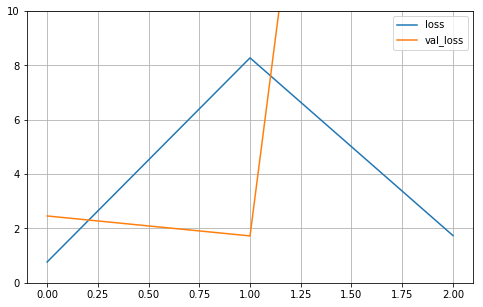

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [11]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: nan


nan